# 장애인콜택시 대기시간 예측
## 단계1.데이터 전처리

## 0.미션

* 1.데이터를 탐색하며 정보 획득
    * 데이터는 2015-01-01 ~ 2022-12-31 까지의 서울 장애인 콜택시 운행 정보입니다. 우리는 평균대기시간을 예측하고자 합니다. 
    * 요일, 월, 계절, 연도별 운행 정보에 어떤 주기와 변화가 있는지 탐색해 봅시다.
* 2.분석을 위한 데이터 구조 만들기
    * 문제정의 : 
        * 전 날 콜택시 운행이 종료되었을 때, 다음 날 대기시간을 예측하고자 합니다.

        * 만약 다음 날 대기시간을 예측할 수 있다면, 일정 범위 내에서 배차를 조절할 수 있을 뿐만 아니라, 향후 교통약자의 이동 편의 증진을 위한 정책 수립 및 개선에 기여할 수 있습니다. 
    * 이를 위한 데이터 구조를 만들어 봅시다.
        * 분석 단위는 일별 데이터 입니다.
        * 주어진 데이터 : 장애인 콜택시 운행 정보, 서울시 날씨
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전 날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
        * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙여서 만듭시다.
        * 휴무일 데이터는 패키지를 통해서 다운받아 사용합니다.
    * Feature Engineering
        * 대기시간에 영향을 주는 요인을 도출하고(가설수립) 이를 feature로 생성합시다.
        * 주어진 그대로의 데이터가 아닌 새로운 feature를 생성해 봅시다.
            * 날짜와 관련된 feature : 요일, 월, 계절 ... 
            * 시계열 특성이 반영된 feature : 최근 7일간의 평균 대기시간 ...




## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [4]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.
import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

### (3) 데이터 불러오기
* 주어진 데이터셋
    * 장애인 콜택시 운행 정보 : open_data.csv
    * 날씨 데이터 : weather.csv

#### 1) 데이터로딩

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data = pd.read_csv('open_data.csv')
data.head()

,기준일,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611
2,2015-01-03,209,1648,1514,26.2,2377,10198
3,2015-01-04,196,1646,1526,24.5,2431,10955
4,2015-01-05,421,4250,3730,26.2,2214,8663


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weather_data = pd.read_csv('weather.csv')
weather_data.head()

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.90
1,2012-01-02,-1.2,-8.3,0.0,80.0,48.0,6.16
2,2012-01-03,-0.4,-6.6,0.4,86.0,45.0,4.46
3,2012-01-04,-4.6,-9.5,0.0,66.0,38.0,8.05
4,2012-01-05,-1.4,-9.6,0.0,71.0,28.0,9.14


#### 2) 기본 정보 조회

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 전체 데이터의 행,열 개수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일     2922 non-null   object 
 1   차량운행    2922 non-null   int64  
 2   접수건     2922 non-null   int64  
 3   탑승건     2922 non-null   int64  
 4   평균대기시간  2922 non-null   float64
 5   평균요금    2922 non-null   int64  
 6   평균승차거리  2922 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 159.9+ KB


In [6]:
data.describe()

,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,418.701916,3925.607803,3283.895277,40.305681,2304.272416,9253.500000
std,133.755162,1509.741713,1249.165876,14.098550,107.260080,1019.198152
min,132.000000,527.000000,462.000000,17.200000,2131.000000,7672.000000
25%,278.000000,2162.500000,1779.000000,29.600000,2228.000000,8521.000000
50%,454.000000,4720.500000,3932.500000,38.200000,2257.000000,8821.500000
75%,522.000000,5110.000000,4241.000000,48.600000,2400.750000,10153.000000
max,1413.000000,6182.000000,5189.000000,96.100000,2733.000000,14136.000000


In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 전체 데이터의 모든 변수 확인
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4018 non-null   object 
 1   temp_max         4018 non-null   float64
 2   temp_min         4018 non-null   float64
 3   rain(mm)         4018 non-null   float64
 4   humidity_max(%)  4018 non-null   float64
 5   humidity_min(%)  4018 non-null   float64
 6   sunshine(MJ/m2)  4018 non-null   float64
dtypes: float64(6), object(1)
memory usage: 219.9+ KB


#### 3) 칼럼이름을 영어로 변경
* 꼭 필요한 작업은 아니지만, 데이터를 편리하게 다루고 차트에서 불필요한 경고메시지를 띄우지 않게 하기 위해 영문으로 변경하기를 권장합니다.


In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data.columns = ['Date', 'car_num', 'receipt', 'ride', 'avg_wait_time', 'avg_fare', 'avg_distance']

# 확인
data.head()

,Date,car_num,receipt,ride,avg_wait_time,avg_fare,avg_distance
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611
2,2015-01-03,209,1648,1514,26.2,2377,10198
3,2015-01-04,196,1646,1526,24.5,2431,10955
4,2015-01-05,421,4250,3730,26.2,2214,8663


## 2.데이터 기본 탐색

* **세부요구사항**
    * 날짜 요소에 따라 각 정보의 패턴을 조회 합니다.
        * 일별, 요일별, 주차별, 월별, 연도별
        * 차량운행, 접수건, 탑승건, 거리, 요금, 대기시간 등
    * 제시된 범위 외에 가능하다면 추가 탐색을 시도합니다.
        * 계절별, 주말여부

### (1) 주기별 분석을 위해서 날짜 변수 추가하기
* data를 복사합니다.
* 복사한 df에 요일, 주차, 월, 연도 등을 추가합니다.
* 일, 계절, 주말 여부 추가

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df = data.copy()

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2922 non-null   datetime64[ns]
 1   car_num        2922 non-null   int64         
 2   receipt        2922 non-null   int64         
 3   ride           2922 non-null   int64         
 4   avg_wait_time  2922 non-null   float64       
 5   avg_fare       2922 non-null   int64         
 6   avg_distance   2922 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 159.9 KB


In [14]:
# 요일 (0이 월요일)
df['Weekday'] = df['Date'].dt.weekday

# 주차
# df['Week'] = df['Date'].dt.isocalendar().week

# 월
df['Month'] = df['Date'].dt.month

# 연도
df['Year'] = df['Date'].dt.year

# 일
df['Day'] = df['Date'].dt.day

# 계절 할당하는 함수
def assign_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    elif month == 12 or month <= 2:
        return 'Winter'
    else:
        return None  # 다른 조건에 해당하지 않는 경우 None 반환

# 계절
df['Season'] = df['Month'].apply(assign_season)

# 주말
df['Weekend'] = df['Weekday'].apply(lambda day: 1 if day >=5 else 0)

In [15]:
df.head()

,Date,car_num,receipt,ride,avg_wait_time,avg_fare,avg_distance,Weekday,Month,Year,Day,Season,Weekend
0,2015-01-01,213,1023,924,23.2,2427,10764,3,1,2015,1,Winter,0
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,2015,2,Winter,0
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,2015,3,Winter,1
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,2015,4,Winter,1
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2015,5,Winter,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2922 non-null   datetime64[ns]
 1   car_num        2922 non-null   int64         
 2   receipt        2922 non-null   int64         
 3   ride           2922 non-null   int64         
 4   avg_wait_time  2922 non-null   float64       
 5   avg_fare       2922 non-null   int64         
 6   avg_distance   2922 non-null   int64         
 7   Weekday        2922 non-null   int32         
 8   Month          2922 non-null   int32         
 9   Year           2922 non-null   int32         
 10  Day            2922 non-null   int32         
 11  Season         2922 non-null   object        
 12  Weekend        2922 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(6), object(1)
memory usage: 251.2+ KB


### (2) 일별

* 차량 운행수

In [17]:
cols = df.columns[1:7]
cols

Index(['car_num', 'receipt', 'ride', 'avg_wait_time', 'avg_fare',
       'avg_distance'],
      dtype='object')

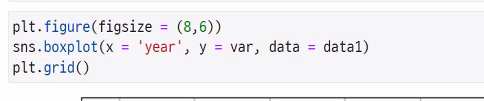

In [18]:
def plot_graphs(by):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 6))

    for i, col in enumerate(cols):
        sns.barplot(data=df, x=by, y=col, estimator='mean', ax=axes[i // 3, i % 3])
        
    plt.tight_layout()
    plt.show()

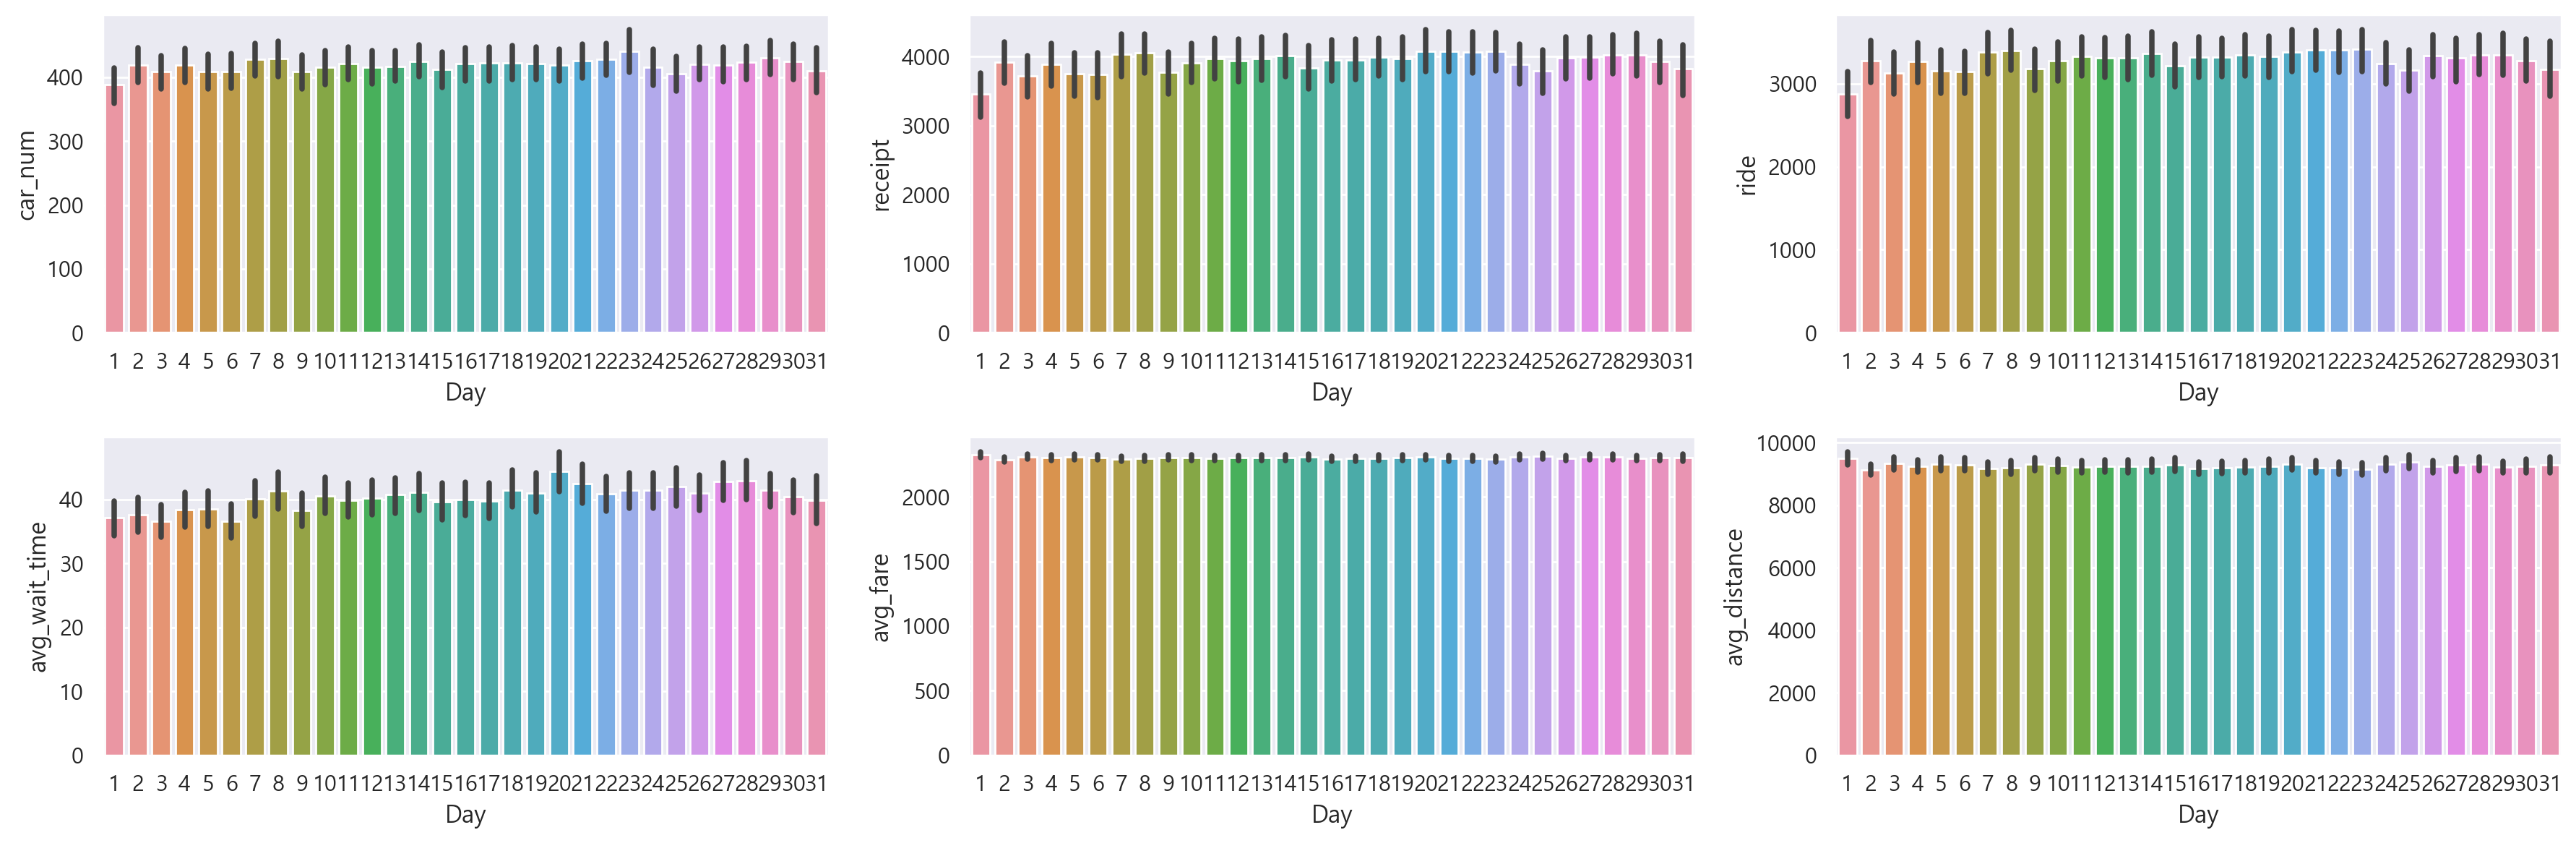

In [19]:
plot_graphs(by='Day')

### (3) 요일별

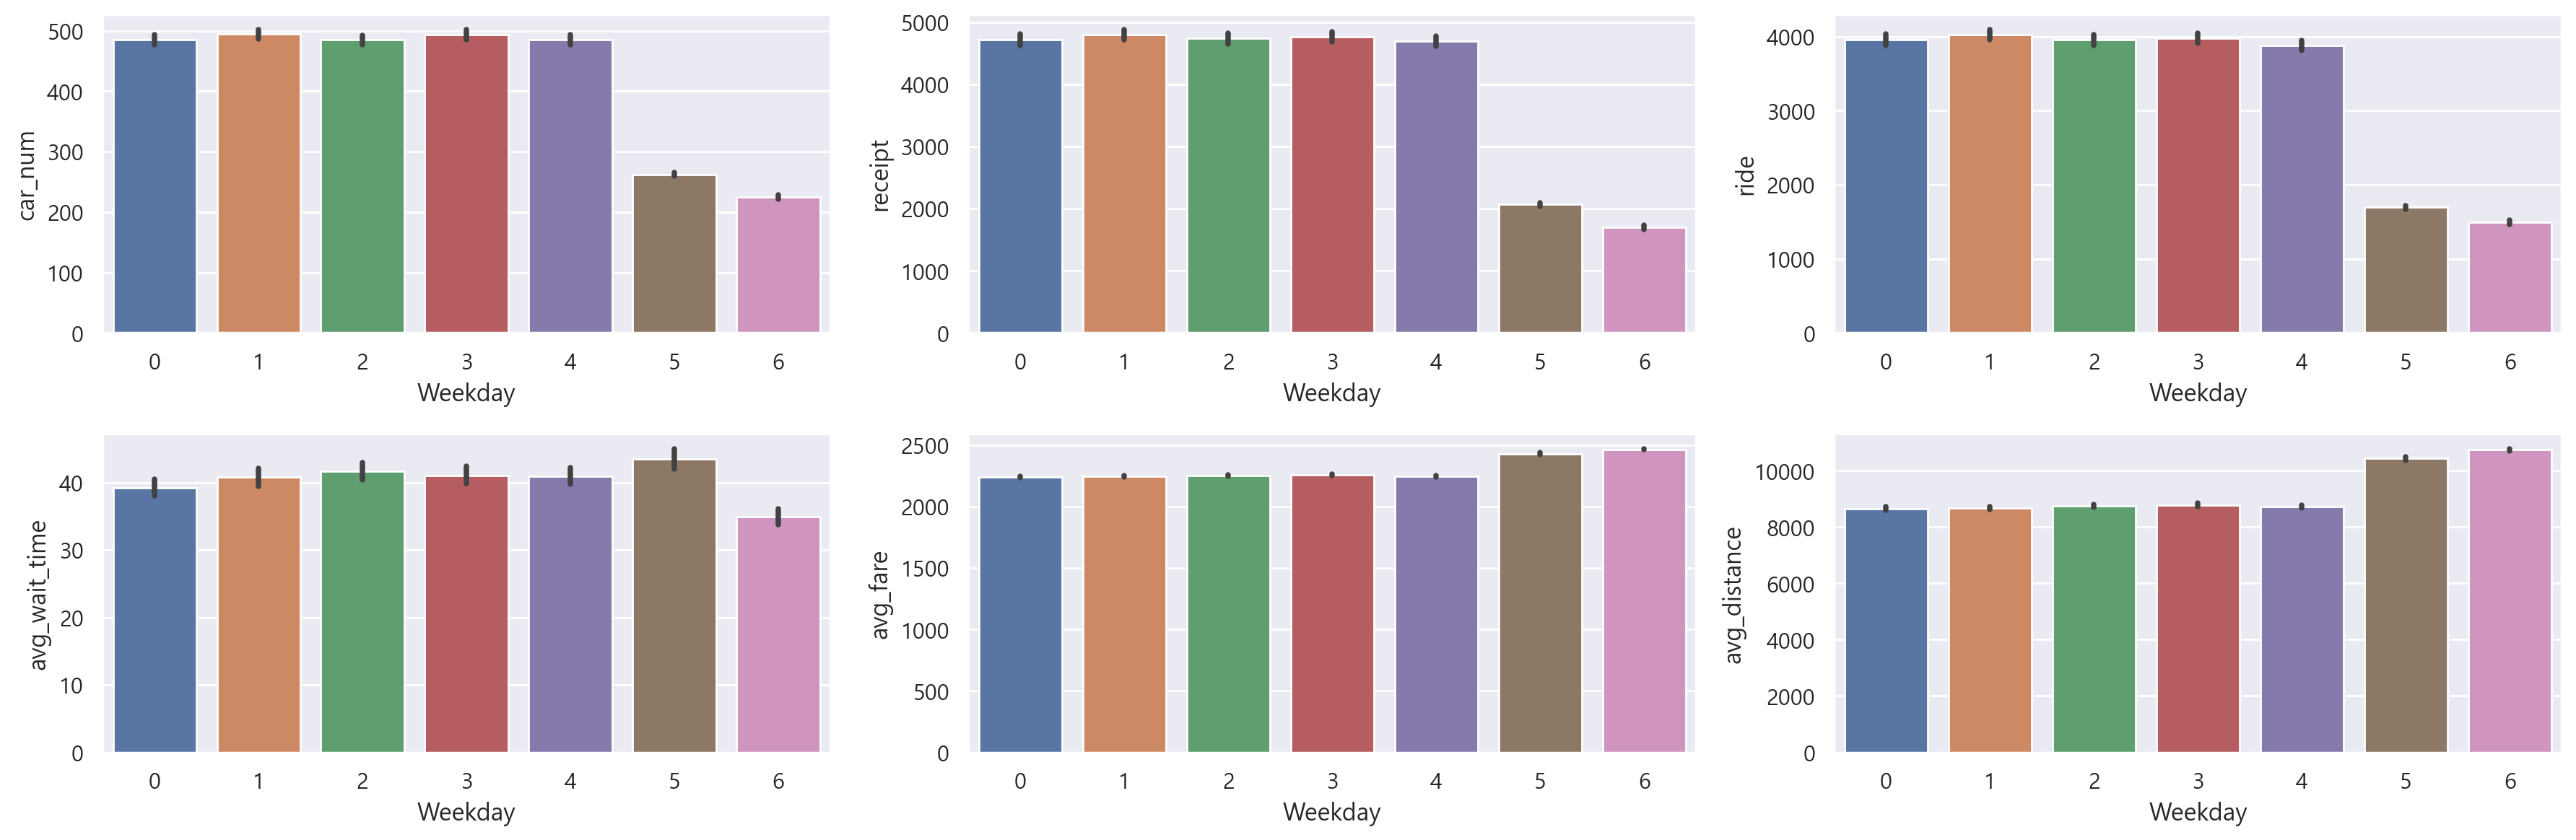

In [20]:
plot_graphs('Weekday')

### (4) 월별

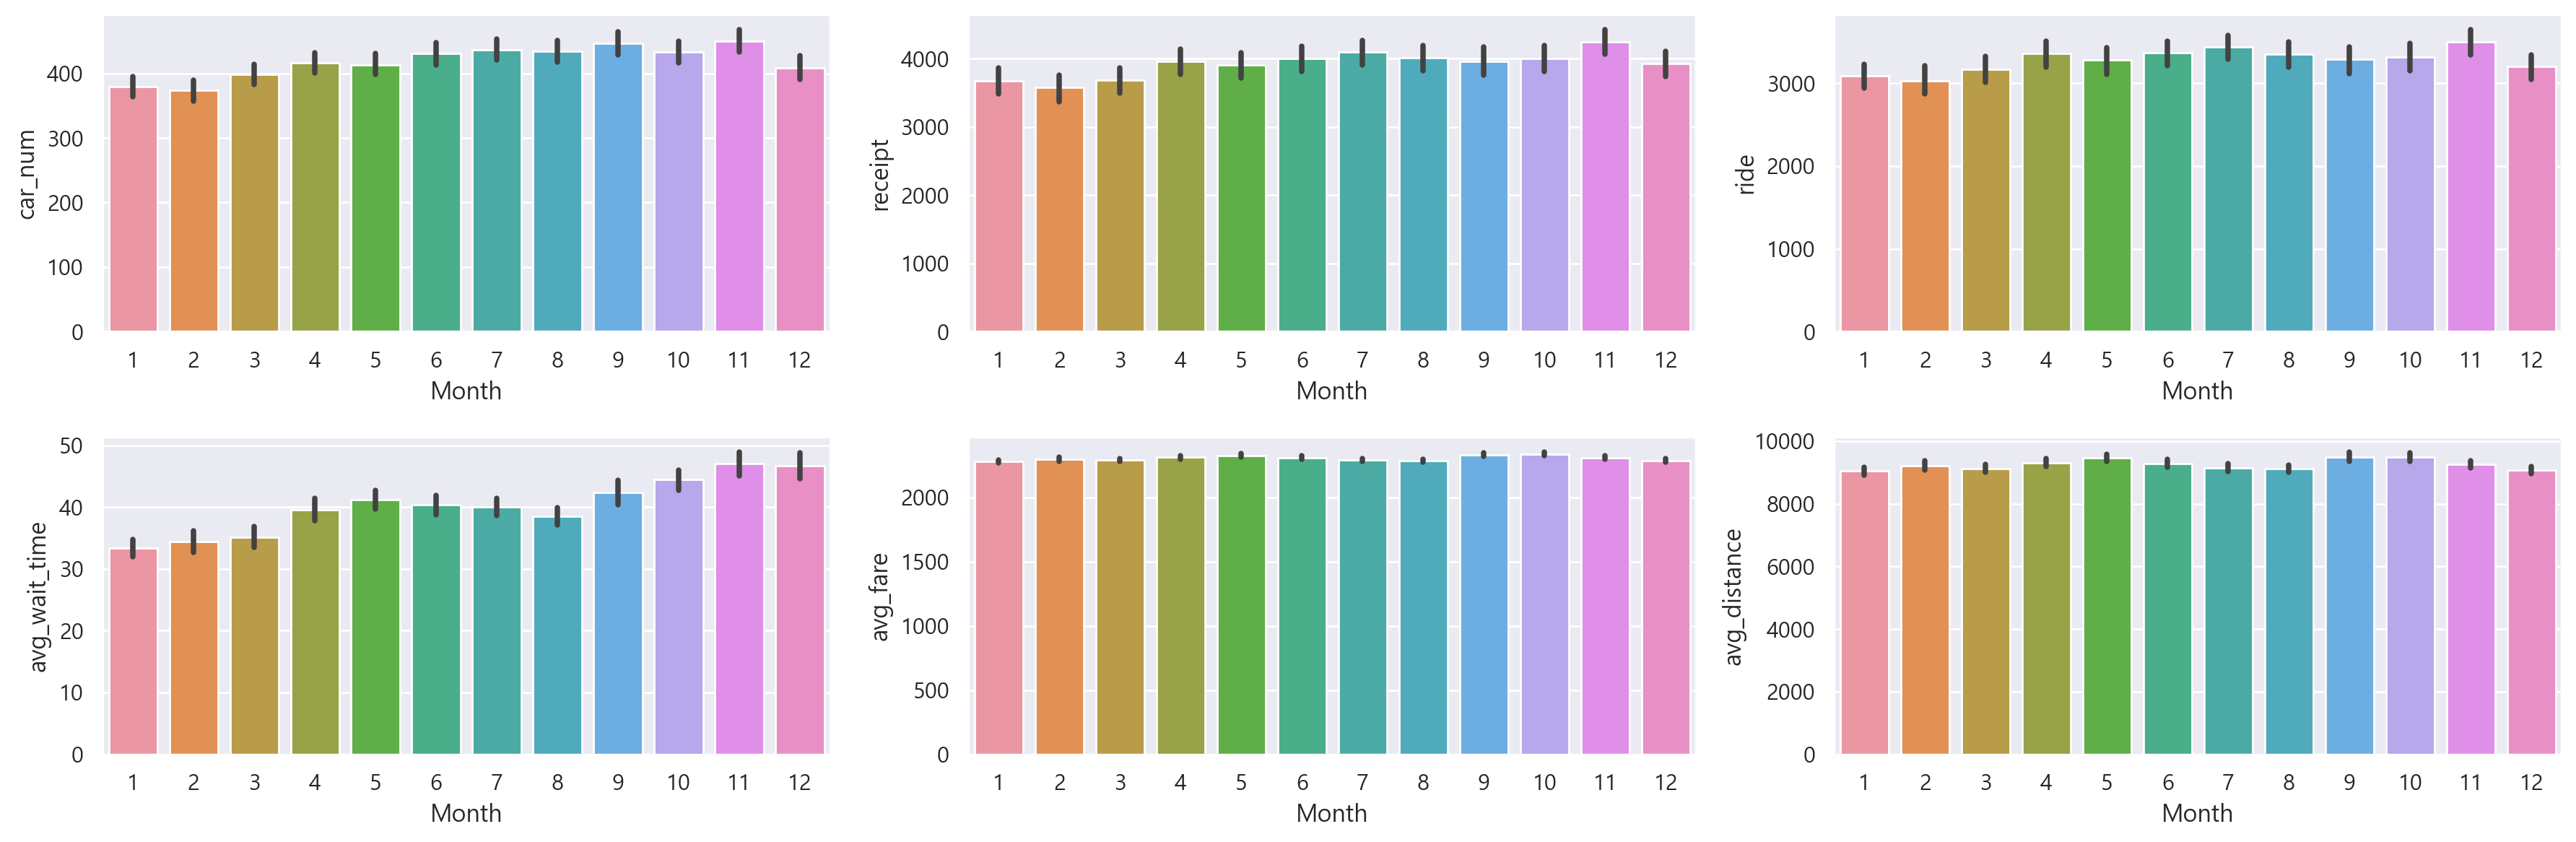

In [21]:
plot_graphs('Month')

### (5) 연도별

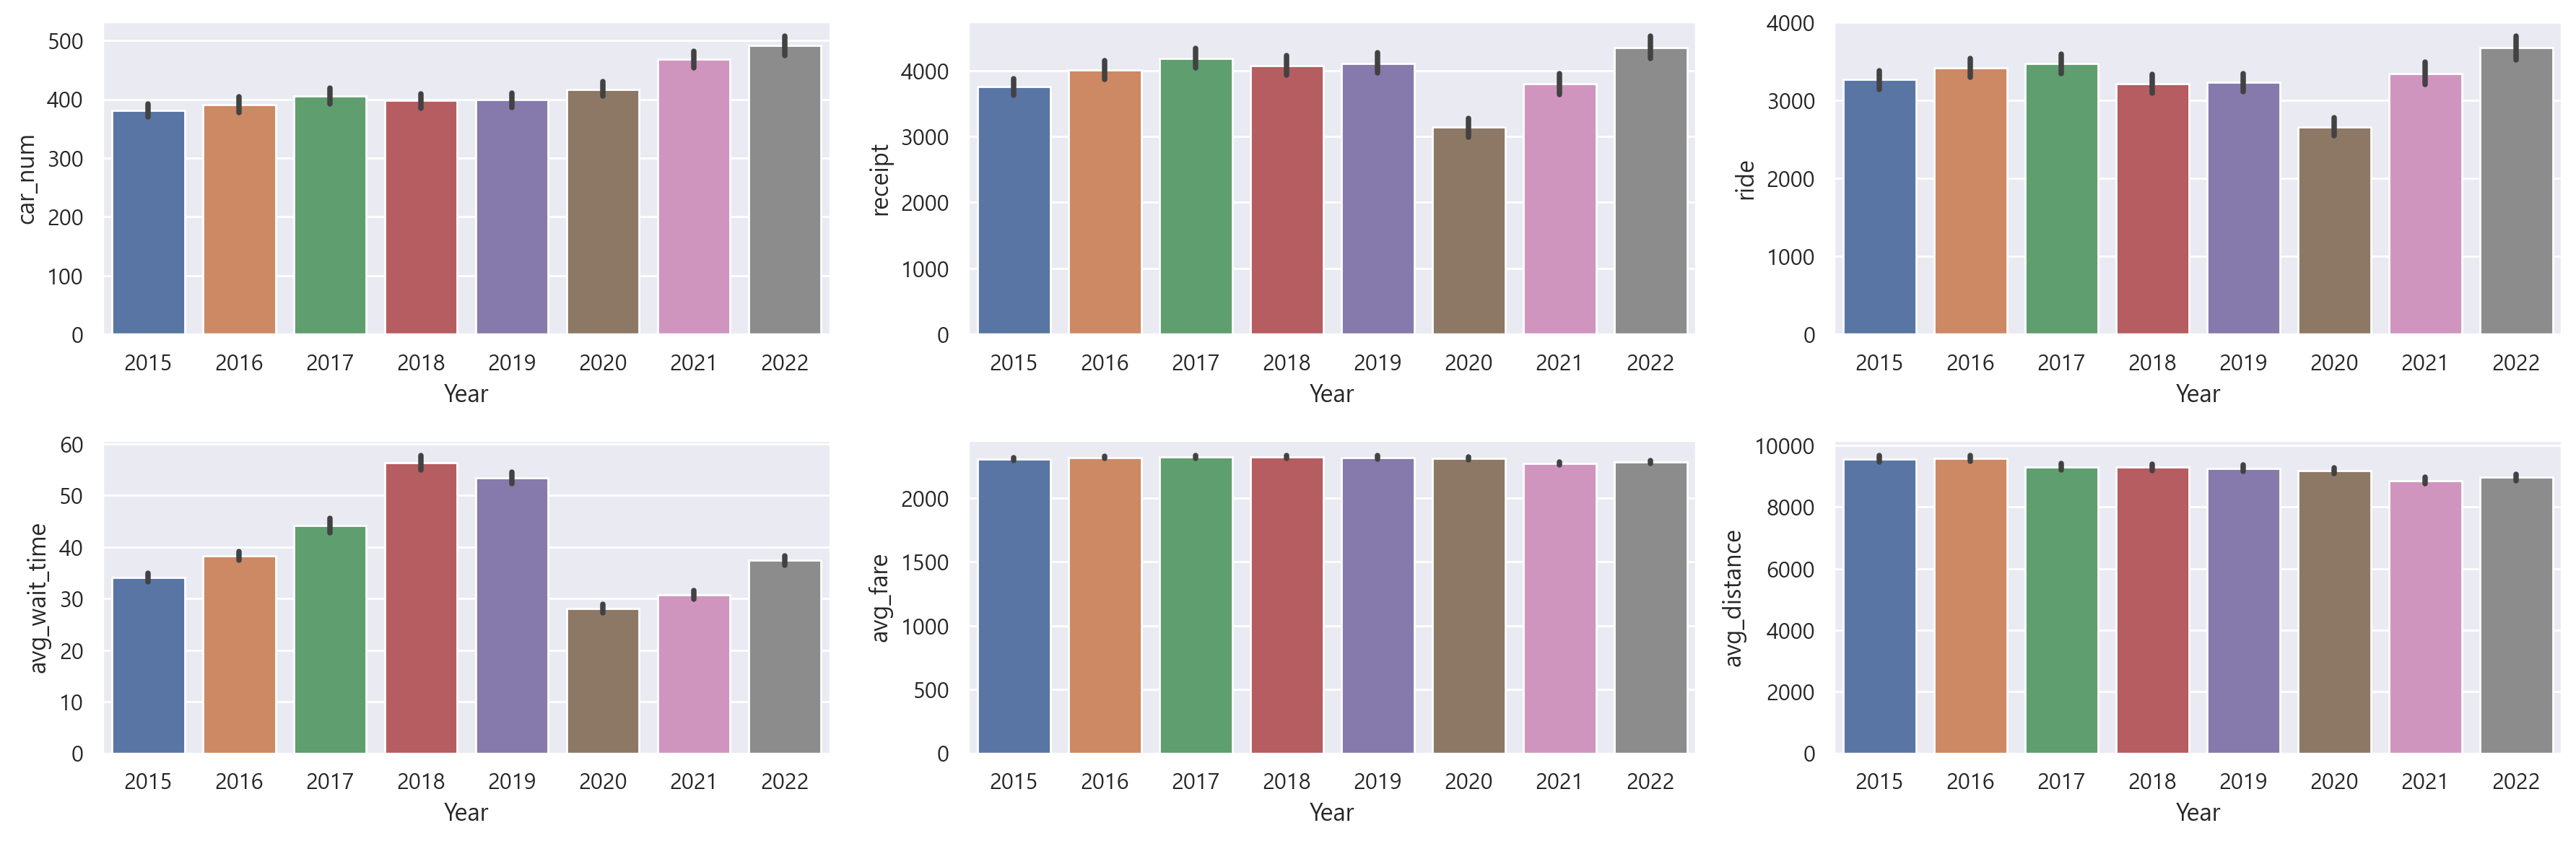

In [22]:
plot_graphs('Year')

### (5) 계절별

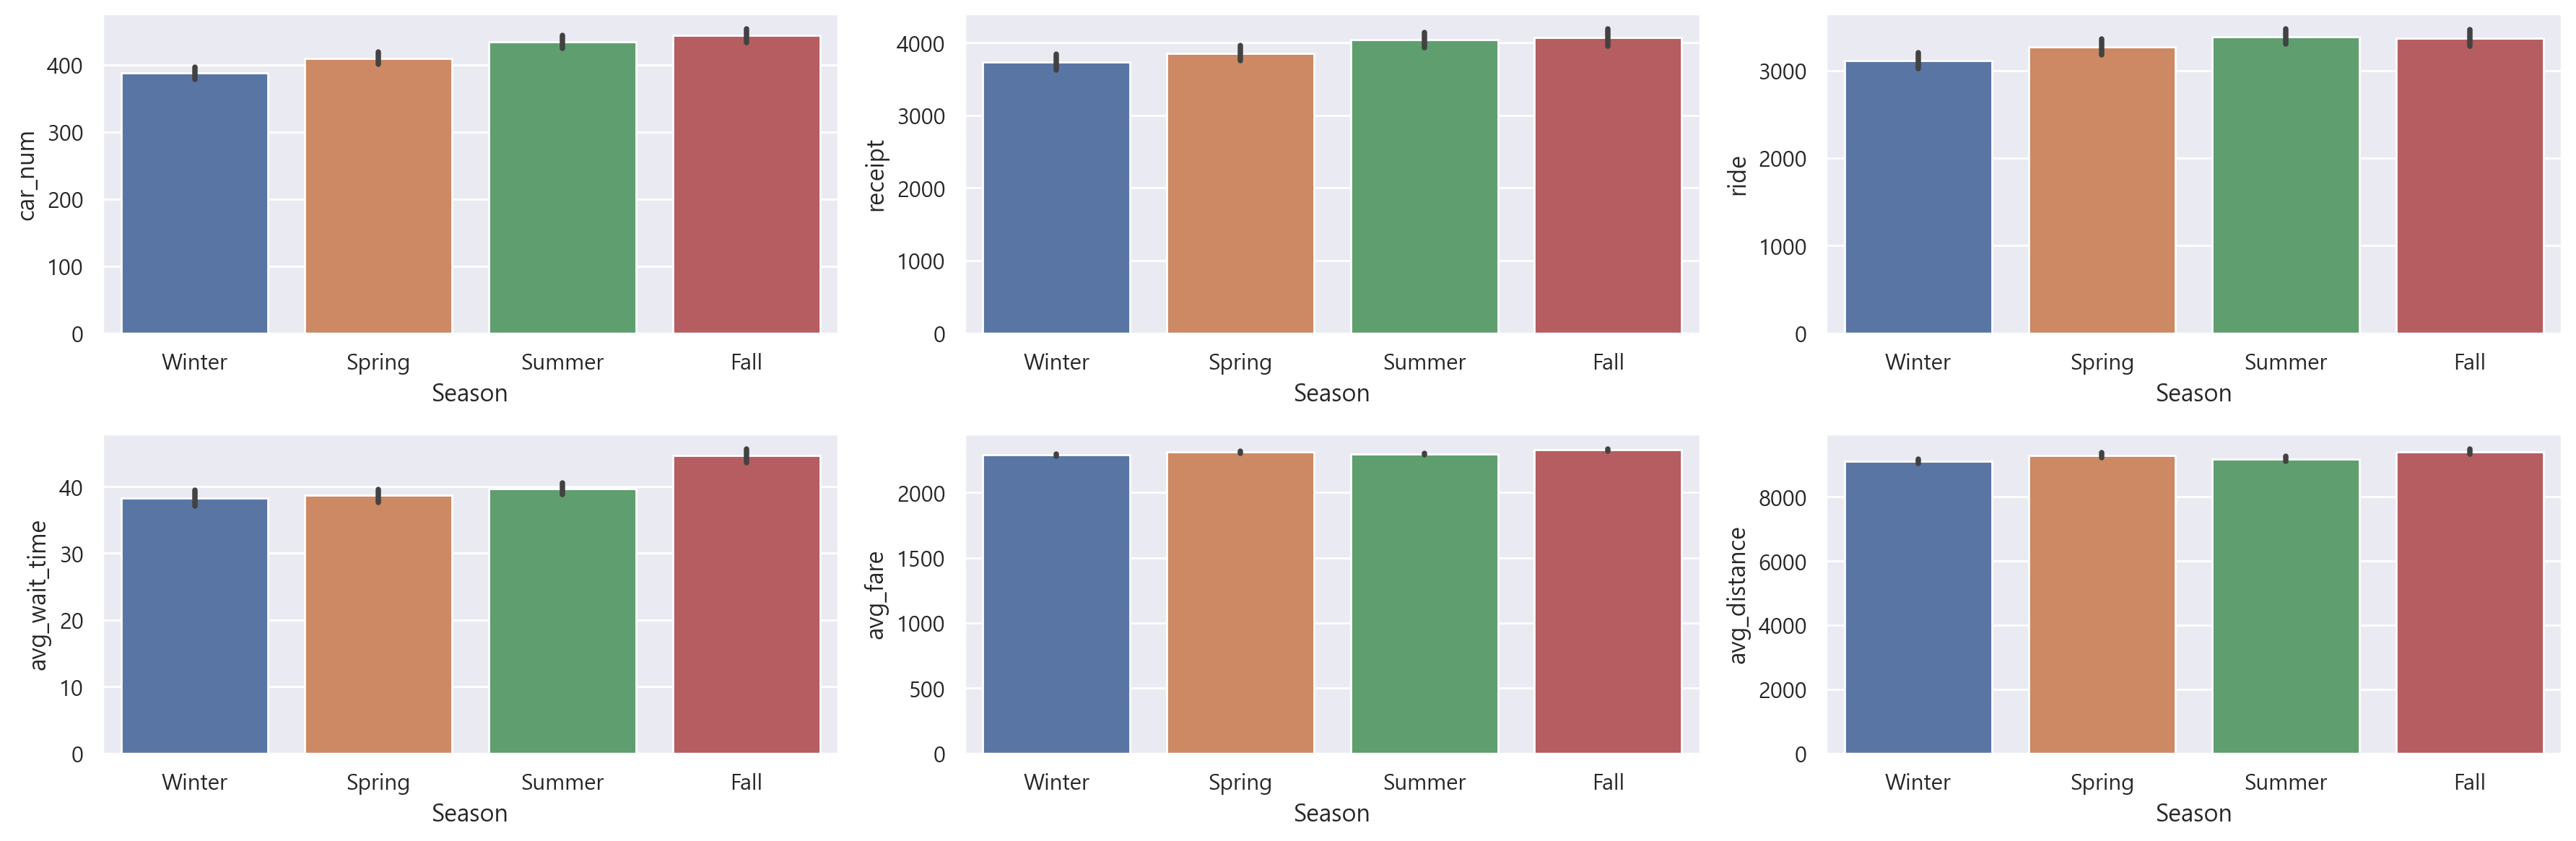

In [23]:
plot_graphs('Season')

### (5) 주말 여부별

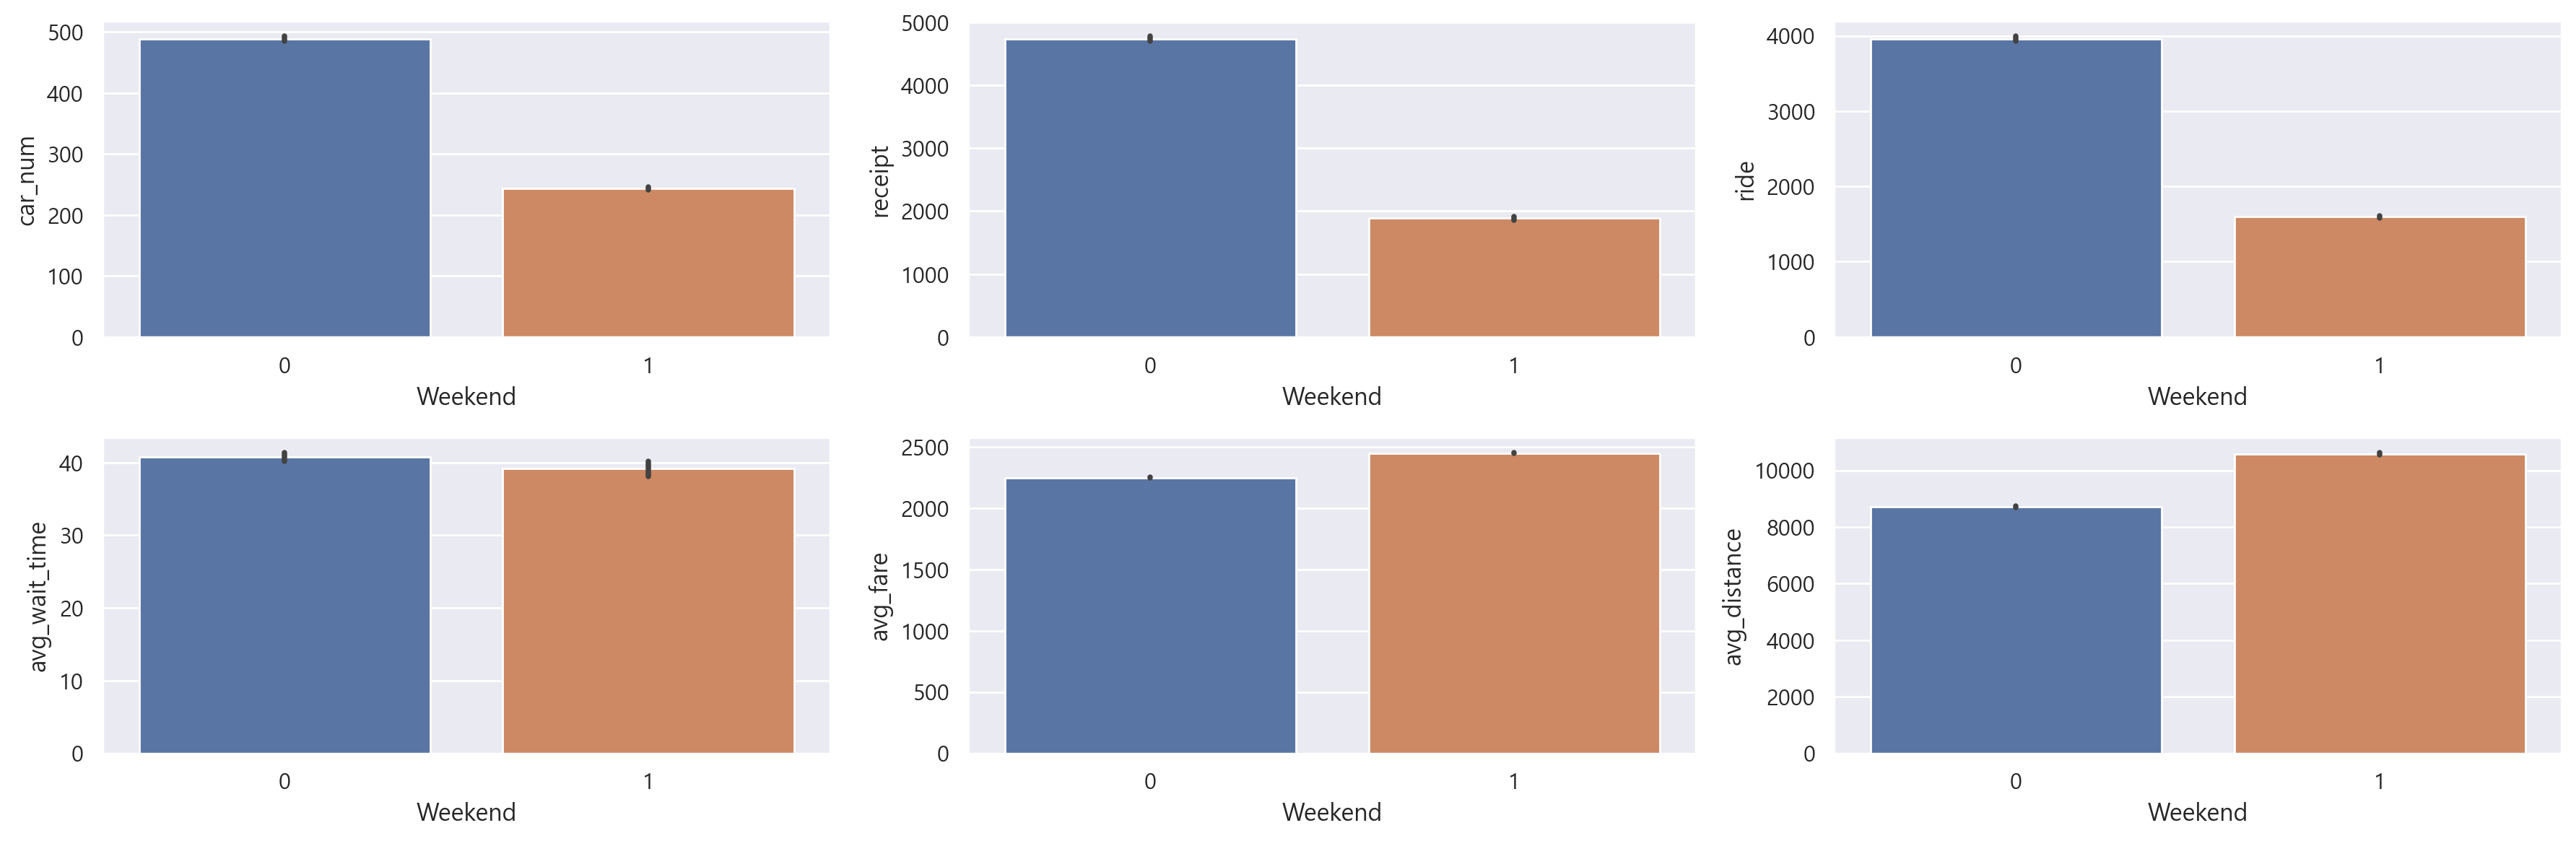

In [24]:
plot_graphs('Weekend')

## 3.데이터 구조 만들기

* **세부요구사항**
    * 조건 : 
        * 목표 : 전날 저녁, 다음날 평균 대기시간을 예측하고자 합니다.
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다. 
            * 예를 들어, 
                * 2020-12-23 의 날씨 데이터는 전날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
    * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙입니다.

### (1) target 만들기
* 예측하는 날짜, 대기시간(target)으로 기준을 잡습니다.

In [25]:
target = 'avg_wait_time'

### (2) 날씨 데이터 붙이기
* merge를 활용합니다. 기준은 운행정보 입니다.

In [40]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weather_data['Date'] = weather_data['Date'].shift() # default = 1
weather_data.tail(5)

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
4013,2022-12-25,3.0,-7.3,0.0,86.0,51.0,10.25
4014,2022-12-26,-0.3,-5.4,0.1,92.0,40.0,10.86
4015,2022-12-27,1.7,-7.8,0.0,71.0,34.0,10.88
4016,2022-12-28,2.1,-4.0,0.0,87.0,38.0,10.84
4017,2022-12-29,-4.4,-4.4,0.0,66.0,66.0,0.00


In [27]:
data = pd.merge(data, weather_data, how='inner', on = 'Date')

In [41]:
data.tail()

,Date,car_num,receipt,ride,avg_wait_time,avg_fare,avg_distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
2916,2022-12-26,603,5555,4605,39.2,2163,7889,3.0,-7.3,0.0,86.0,51.0,10.25
2917,2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,92.0,40.0,10.86
2918,2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,71.0,34.0,10.88
2919,2022-12-29,581,5250,4247,52.5,2229,8433,2.1,-4.0,0.0,87.0,38.0,10.84
2920,2022-12-30,600,5293,4200,38.3,2183,8155,-4.4,-4.4,0.0,66.0,66.0,0.00


### (3) 새로운 feature를 생성해 봅시다.
* 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 그외 새로운 feature 도출 : 최소 2개 이상
    * 예 : 공휴일, 최근 7주일간의 평균 대기시간, 탑승률 등

#### 1) 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 요일 이름, 계절이름, 월 이름으로 만드는 경우에는, 변수를 pd.Categorical로 범주형을 만들면서 순서를 지정하는 것이 이후 그래프를 그릴 때 순서대로 표현할 수 있습니다.


In [29]:
data0 = data.copy()
data0['Date'] = pd.to_datetime(data0['Date'])

In [30]:
data0['weekday'] = data0['Date'].dt.day_name()
data0['weekday'] = pd.Categorical(data0['weekday'], 
                                  categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
data0['month'] = data0['Date'].dt.month

data0['season'] = np.where(data0['month'].isin([3,4,5]), 'Spring',
                           np.where(data0['month'].isin([6,7,8]), 'Summer',
                                    np.where(data0['month'].isin([9,10,11]), 'Fall', 'Winter')))
data0['season'] = pd.Categorical(data0['season'], categories=['Spring','Summer','Fall','Winter'])
                                     
data0['year'] = data0['Date'].dt.year

data0['weekend'] = data0['weekday'].apply(lambda day: 1 if day=='Saturday' or day== 'Sunday' else 0)
data0

,Date,car_num,receipt,ride,avg_wait_time,avg_fare,avg_distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,weekend
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,1,Winter,2015,0
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,1,Winter,2015,0
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,1,Winter,2015,1
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,1,Winter,2015,1
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,1,Winter,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2022-12-26,603,5555,4605,39.2,2163,7889,3.0,-7.3,0.0,86.0,51.0,10.25,Monday,12,Winter,2022,0
2917,2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,92.0,40.0,10.86,Tuesday,12,Winter,2022,0
2918,2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,71.0,34.0,10.88,Wednesday,12,Winter,2022,0
2919,2022-12-29,581,5250,4247,52.5,2229,8433,2.1,-4.0,0.0,87.0,38.0,10.84,Thursday,12,Winter,2022,0


#### 2) 공휴일 정보
* workalendar 패키지를 설치하고, 대한민국 공휴일 정보를 끌어와 봅시다.

* 휴무일 데이터 패키지 설치

In [31]:
!pip install workalendar

* 간단 사용법

In [32]:
from workalendar.asia import SouthKorea
cal = SouthKorea()
pd.DataFrame(cal.holidays(2023))

,0,1
0,2023-01-01,New year
1,2023-01-21,Korean New Year's Day
2,2023-01-22,Korean New Year's Day
3,2023-01-23,Korean New Year's Day
4,2023-03-01,Independence Day
5,2023-05-05,Children's Day
6,2023-05-26,Buddha's Birthday
7,2023-06-06,Memorial Day
8,2023-08-15,Liberation Day
9,2023-09-28,Midautumn Festival


* 휴무일 데이터셋 만들기 2015 ~ 2022
* 실제로 휴무일에 해당하지만 workalendar 라이브러리에 없는 날짜는 직접 추가해봅시다.
    * 휴무일 장애인 콜택시의 접수건 변화에 대한 특징을 찾아 이를 바탕으로 데이터를 조회하여 찾아볼 수 있음

In [33]:
from workalendar.asia import SouthKorea

cal = SouthKorea()
holiday = pd.DataFrame()
for y in range(2015, 2023) :
    holiday = pd.concat([holiday, pd.DataFrame(cal.holidays(y))], axis = 0)

holiday.columns = ['Date', 'holiday']
holiday['Date'] = pd.to_datetime(holiday['Date'])
holiday['holiday'] = 1
holiday

,Date,holiday
0,2015-01-01,1
1,2015-02-18,1
2,2015-02-19,1
3,2015-02-20,1
4,2015-03-01,1
...,...,...
10,2022-09-10,1
11,2022-09-11,1
12,2022-10-03,1
13,2022-10-09,1


* 기존 데이터에 휴무일 정보 결합하기.
* 휴무일이 아닌 날짜는 0으로 저장하시오.

In [34]:
data0 = pd.merge(data0, holiday, how = 'left')
data1 = data0.fillna({'holiday':0})

In [35]:
data1.head()

,Date,car_num,receipt,ride,avg_wait_time,avg_fare,avg_distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,weekend,holiday
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,1,Winter,2015,0,1.0
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,1,Winter,2015,0,0.0
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,1,Winter,2015,1,0.0
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,1,Winter,2015,1,0.0
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,1,Winter,2015,0,0.0


#### 3) 7일 이동평균 대기시간
* rolling().mean() 사용

데이터리키지 방지하려면 train, test 데이터 분리해 각각 6개씩 제외되게 해야 함..

In [36]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data1['avg_wait_time_MA7'] = data1['avg_wait_time'].rolling(7).mean()
data1.head(8)

,Date,car_num,receipt,ride,avg_wait_time,avg_fare,avg_distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,weekend,holiday,avg_wait_time_MA7
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,1,Winter,2015,0,1.0,NaN
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,1,Winter,2015,0,0.0,NaN
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,1,Winter,2015,1,0.0,NaN
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,1,Winter,2015,1,0.0,NaN
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,1,Winter,2015,0,0.0,NaN
5,2015-01-06,417,3991,3633,23.6,2211,8545,-1.0,-8.8,0.0,42.0,24.0,10.12,Tuesday,1,Winter,2015,0,0.0,NaN
6,2015-01-07,410,4085,3676,24.7,2230,8646,-0.2,-9.2,0.0,62.0,27.0,10.09,Wednesday,1,Winter,2015,0,0.0,23.657143
7,2015-01-08,419,4030,3728,21.2,2231,8683,3.2,-6.8,0.0,78.0,38.0,8.74,Thursday,1,Winter,2015,0,0.0,23.371429


#### 4) 탑승률

In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data1['ride_rate'] = data1['ride'] / data1['receipt']
data1.head(5)

,Date,car_num,receipt,ride,avg_wait_time,avg_fare,avg_distance,temp_max,temp_min,rain(mm),...,humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,weekend,holiday,avg_wait_time_MA7,ride_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,...,28.0,9.07,Thursday,1,Winter,2015,0,1.0,NaN,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,...,37.0,8.66,Friday,1,Winter,2015,0,0.0,NaN,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,...,58.0,5.32,Saturday,1,Winter,2015,1,0.0,NaN,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,...,52.0,6.48,Sunday,1,Winter,2015,1,0.0,NaN,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,...,29.0,10.47,Monday,1,Winter,2015,0,0.0,NaN,0.877647


In [38]:
# 이상치 확인 (접수건 < 탑승건)
(data1['ride_rate']>1).sum()

0

## 4.데이터 저장
* **세부요구사항**
    * joblib 을 사용하여 작업 경로에 정리한 데이터프레임을 저장합니다.
        * 저장파일이름 : data1.pkl

In [39]:
joblib.dump(data1, 'data1.pkl')

['data1.pkl']

## 시계열 분석 기초 (Stationary / Normality)

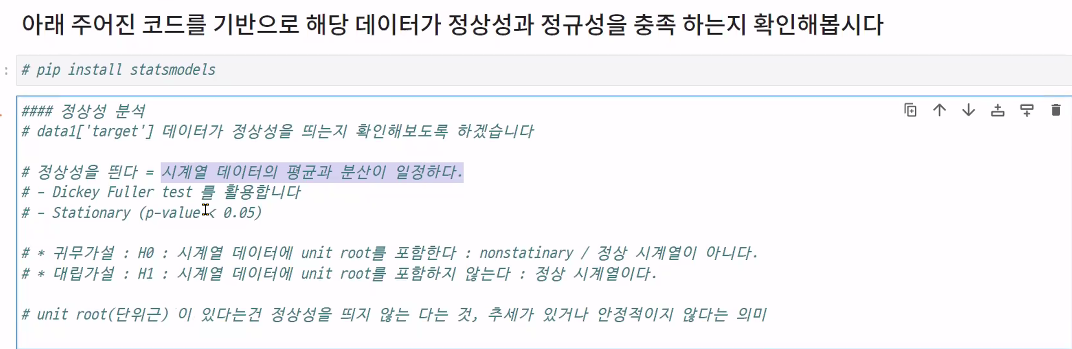
정상성을 띄는 데이터; ex) sin...
시계열 데이터는 정상성을 띈다는 걸 전제로 분석함

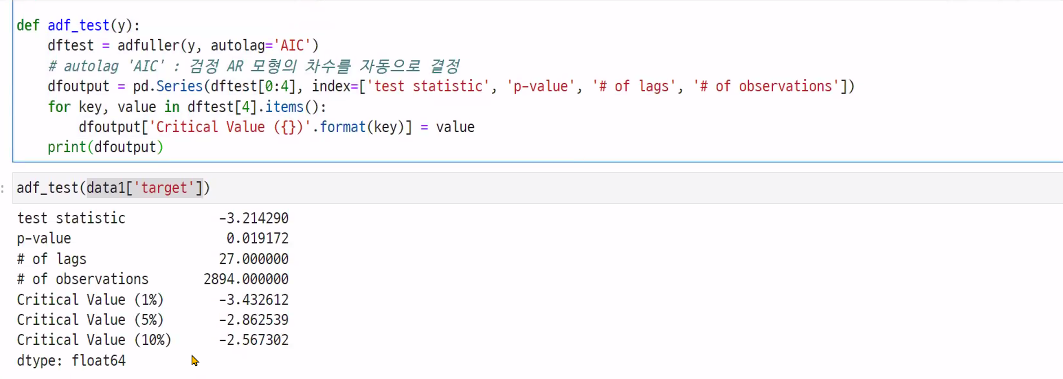
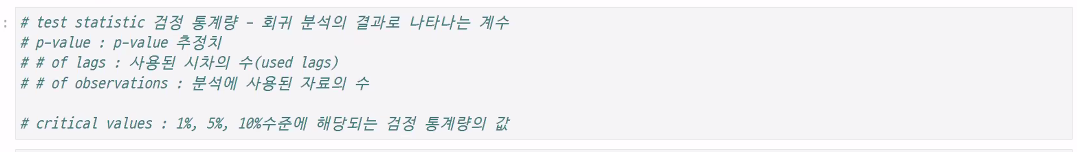

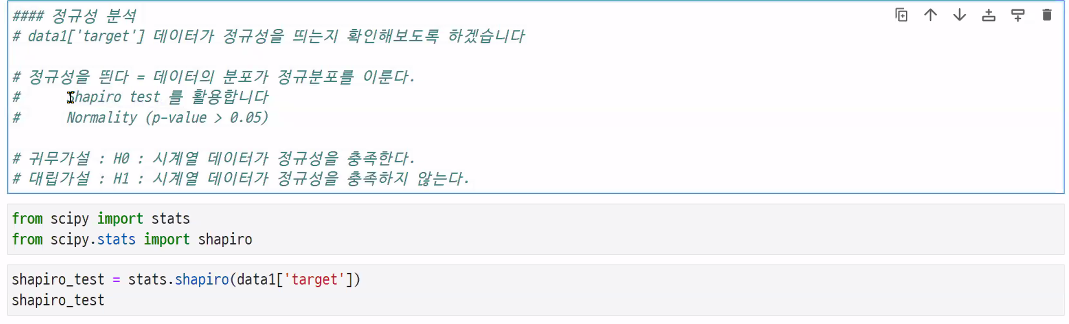
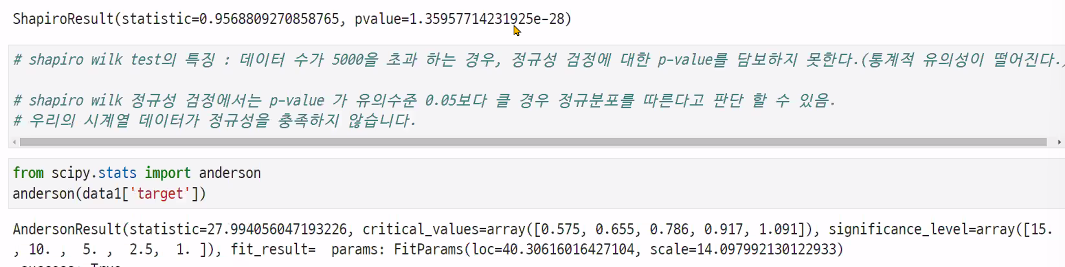